# XGBoost Model

## Imports

In [1]:
# Preprocessing and encoding variables
import pandas as pd
import numpy as np
from scipy.stats import uniform, randint

# Using Skicit-learn to split data into training and testing sets

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import the classifier we are using
import xgboost as xgb
from xgboost import XGBClassifier

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Visualising feature importance and making plots
import matplotlib.pyplot as plt
import seaborn as sns

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, roc_auc_score

## Import multiple genomes

In [2]:
G1 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G1.features.csv').iloc[:, 1:]
G2 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G2.features.csv').iloc[:, 1:]
G3 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G3.features.csv').iloc[:, 1:]
G4 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G4.features.csv').iloc[:, 1:]
G5 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G5.features.csv').iloc[:, 1:]

In [3]:
G1 = G1.sample(3000)
G2 = G2.sample(3000)
G3 = G3.sample(3000)
G4 = G4.sample(3000)
G5 = G5.sample(3000)

In [4]:
frames = [G1, G2, G3, G4, G5]
df = pd.concat(frames)
df.tail(10)

,Type,Length,Dataset,Genome,GC_content,GC1_content,GC2_content,GC3_content,Start_ATG,Start_GTG,...,c_weight_TCG,c_weight_TCT,c_weight_TGA,c_weight_TGC,c_weight_TGG,c_weight_TGT,c_weight_TTA,c_weight_TTC,c_weight_TTG,c_weight_TTT
2570,LORF,714,1,Campylobacter jejuni,0.508475,0.618644,0.436441,0.470339,1,0,...,0.400000,0.200000,1.0,0.75,1,0.25,0.280000,0.375000,0.080000,0.625000
2154,LORF,477,1,Campylobacter jejuni,0.430736,0.461039,0.376623,0.454545,0,0,...,0.272727,0.181818,0.0,0.00,1,0.00,0.392857,0.363636,0.142857,0.636364
786,LORF,108,1,Campylobacter jejuni,0.419048,0.400000,0.457143,0.400000,0,0,...,0.000000,0.400000,1.0,0.00,0,0.00,0.500000,0.666667,0.000000,0.333333
3388,CDS,1434,1,Campylobacter jejuni,0.437238,0.548117,0.357741,0.405858,1,0,...,0.130435,0.173913,0.0,0.00,1,1.00,0.390244,0.350000,0.121951,0.650000
1142,LORF,147,1,Campylobacter jejuni,0.387755,0.346939,0.367347,0.448980,0,1,...,0.000000,0.000000,0.0,0.00,1,0.00,0.000000,0.750000,0.500000,0.250000
1395,LORF,213,1,Campylobacter jejuni,0.371429,0.371429,0.285714,0.457143,1,0,...,0.000000,0.000000,0.0,0.00,1,0.00,0.176471,0.333333,0.294118,0.666667
55,LORF,45,2,Campylobacter jejuni,0.421053,0.315789,0.421053,0.526316,1,0,...,0.000000,0.000000,0.0,0.00,1,0.00,0.000000,0.000000,0.000000,1.000000
2585,CDS,720,1,Campylobacter jejuni,0.459722,0.466667,0.400000,0.512500,1,0,...,0.176471,0.117647,0.0,1.00,1,0.00,0.300000,0.411765,0.250000,0.588235
2372,CDS,594,1,Campylobacter jejuni,0.407407,0.449495,0.348485,0.424242,1,0,...,0.000000,0.000000,0.0,0.00,1,0.00,0.545455,0.428571,0.151515,0.571429
1304,LORF,186,2,Campylobacter jejuni,0.469945,0.590164,0.377049,0.442623,1,0,...,0.000000,0.000000,0.0,0.00,0,0.00,0.400000,0.000000,0.000000,1.000000


In [5]:
G = df
print('The shape of our dataframe is:', G.shape)

The shape of our dataframe is: (15000, 14791)


In [6]:
G = G.dropna()

In [7]:
print('The shape of our dataframe is:', G.shape)

The shape of our dataframe is: (15000, 14791)


## Import single genome

In [ ]:
G = pd.read_csv('../input/genomespart2/G15.features.csv').iloc[:, 1:]

In [ ]:
print(G[["Length"]].mean())

In [ ]:
G.tail(5)

In [ ]:
print('The shape of our dataframe is:', G.shape)

In [ ]:
G = G.dropna()
print('The shape of our dataframe is:', G.shape)

## Preprocessing

### Encoding target variables

In [8]:
def encode_feature(array):
    """ Encode a categorical array into a number array
    
    :param array: array to be encoded
    :return: numerical array
    """
  
    encoder = preprocessing.LabelEncoder()
    encoder.fit(array)
    return encoder.transform(array)

In [9]:
class_names = ['CDS', 'LORF']
targets = G["Type"].values
print(targets)

['CDS' 'LORF' 'CDS' ... 'CDS' 'CDS' 'LORF']


In [10]:
targets = encode_feature(targets)
print(targets)

[0 1 0 ... 0 0 1]


In [11]:
print('The shape of our dataframe is:', G.shape)
print('Rows:', G.shape[0])
print('Columns:', G.shape[1])

The shape of our dataframe is: (15000, 14791)
Rows: 15000
Columns: 14791


### Selecting features and targets and converting data to arrays

In [12]:
# Labels are the values we want to predict
labels = targets

# Remove the labels from the features -> axis 1 refers to the columns
features = G.drop(['Type','Genome', 'Dataset'], axis = 1)

# Saving feature names as list for later use
feature_names = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [13]:
print('The shape of our features are:', features.shape)

The shape of our features are: (15000, 14788)


### Split into training and testing sets

In [14]:
# Split the data into training and testing sets -> x = features and y = labels/targets
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [15]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (11250, 14788)
Training Labels Shape: (11250,)
Testing Features Shape: (3750, 14788)
Testing Labels Shape: (3750,)


## Train model - default XGBoost

- **learning_rate**: step size shrinkage used to prevent overfitting. Range is [0,1]
- **max_depth**: determines how deeply each tree is allowed to grow during any boosting round.
- **subsample**: percentage of samples used per tree. Low value can lead to underfitting.
- **colsample_bytree**: percentage of features used per tree. High value can lead to overfitting.
- **n_estimators**: number of trees you want to build.
- **objective**: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability. XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

- **gamma**: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- **alpha**: L1 regularization on leaf weights. A large value leads to more regularization.
- **lambda**: L2 regularization on leaf weights and is smoother than L1 regularization.

In [16]:
# Create a Gaussian Classifier
xgb = XGBClassifier(objective="binary:logistic", random_state=42, eval_metric='logloss', use_label_encoder=False)

# Train the model using the training sets 
xgb.fit(train_x, train_y)

[14:24:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [17]:
# Make predictions for test data
y_pred = xgb.predict(test_x)

In [18]:
# Evaluate predictions
print("Accuracy score:", metrics.accuracy_score(test_y, y_pred))
# Precision, Recall and Roc_AUC score
#print("Precision score:", metrics.precision_score(test_y, y_pred))
#print("Recall score:", metrics.recall_score(test_y, y_pred))
#print("ROC_AUC score:", metrics.roc_auc_score(test_y, y_pred))

Accuracy score: 0.896


### Confusion matrix

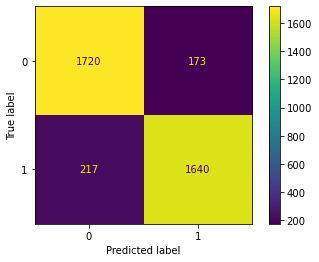

In [19]:
plot_confusion_matrix(xgb, test_x, test_y)  
plt.show()

#plt.savefig('confmatrix_g1_uneven.png', dpi=300, bbox_inches='tight', transparent=True)

## Selected features

In [20]:
feature_imp = pd.Series(xgb.feature_importances_, index = feature_names).sort_values(ascending=False)

In [21]:
selected = feature_imp.iloc[0:200]

In [22]:
selected_feat = list(selected.index)

In [23]:
important_indices = [feature_names.index(x) for x in selected_feat]

In [24]:
# Create a Gaussian Classifier
xgb_select = XGBClassifier(n_estimators=30, objective="binary:logistic", random_state=42, eval_metric='logloss', use_label_encoder=False)

# Select most important features
important_indices = [feature_names.index(x) for x in selected_feat]

train_important = train_x[:, important_indices]
test_important = test_x[:, important_indices]

In [25]:
# Train the model using the training sets 
xgb_select.fit(train_important, train_y)

[19:20:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=30, n_jobs=0,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [26]:
# Make predictions and determine the error
pred_y = xgb_select.predict(test_important)

# Model Accuracy, how often is the classifier correct?
print("Accuracy score:", metrics.accuracy_score(test_y, pred_y))
# Precision, Recall and Roc_AUC score
print("Precision score:", metrics.precision_score(test_y, pred_y))
print("Recall score:", metrics.recall_score(test_y, pred_y))
print("ROC_AUC score:", metrics.roc_auc_score(test_y, pred_y))

Accuracy score: 0.8976
Precision score: 0.9121432568550644
Recall score: 0.8777598276790523
ROC_AUC score: 0.8974113454295947
